# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here
df = pd.read_csv("/Users/beatricefebrina/Documents/Masters/T6/Asg 1/SeoulBikeData.csv")

df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


In [3]:
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


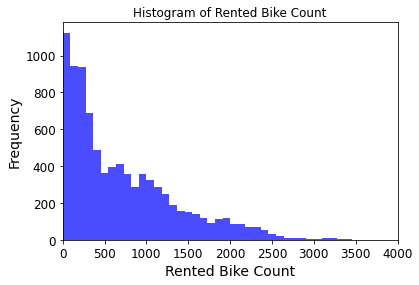

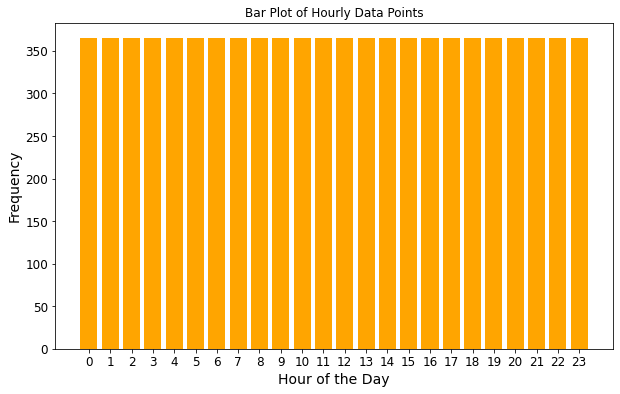

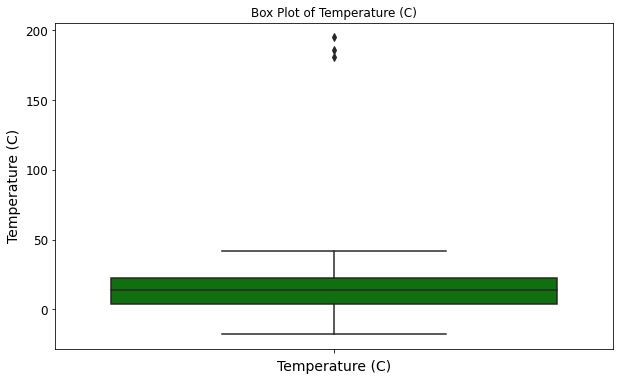

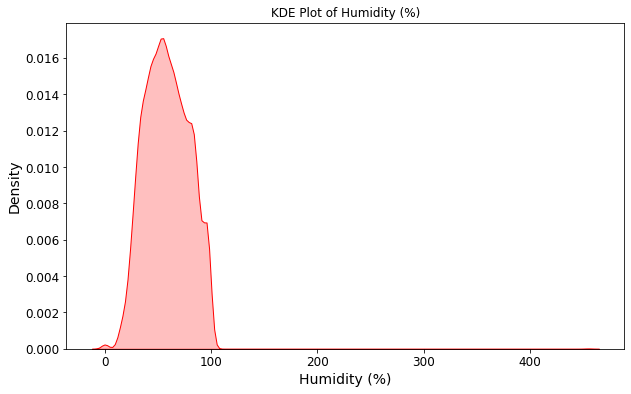

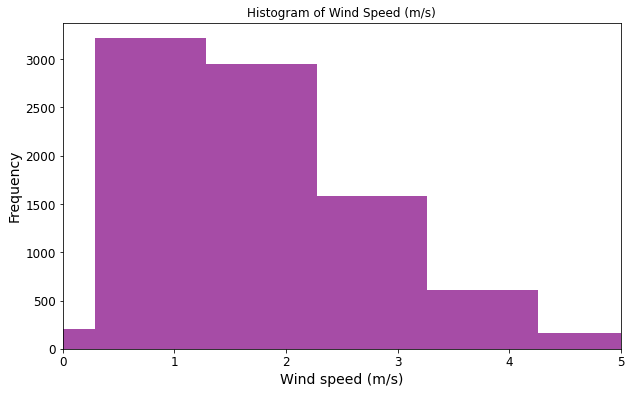

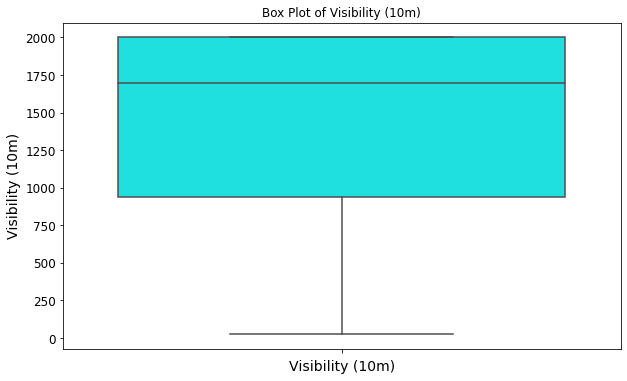

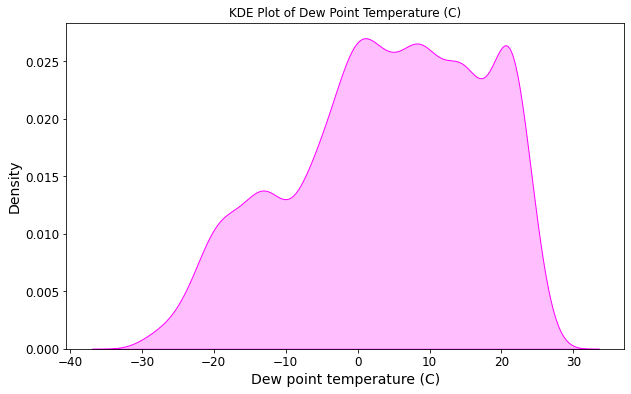

In [4]:
import seaborn as sns

# 1. Rented Bike Count: Histogram
plt.hist(df["Rented Bike Count"], bins=1000, color='blue', alpha=0.7)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Histogram of Rented Bike Count')
plt.xlim(0,4000)
plt.show()

# 2. Hour: Bar plot
hour_counts = df["Hour"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Bar Plot of Hourly Data Points')
plt.xticks(hour_counts.index)
plt.show()

# 3. Temperature (C): Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["Temperature (C)"], color='green')
plt.xlabel('Temperature (C)')
plt.title('Box Plot of Temperature (C)')
plt.show()

# 4. Humidity (%): KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Humidity (%)"], shade=True, color='red')
plt.xlabel('Humidity (%)')
plt.title('KDE Plot of Humidity (%)')
plt.show()

# 5. Wind speed (m/s): Histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Wind speed (m/s)"], bins=1000, color='purple', alpha=0.7)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed (m/s)')
plt.xlim(0,5)
plt.show()

# 6. Visibility (10m): Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["Visibility (10m)"], color='cyan')
plt.xlabel('Visibility (10m)')
plt.title('Box Plot of Visibility (10m)')
plt.show()

# 7. Dew point temperature (C): KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Dew point temperature (C)"], shade=True, color='magenta')
plt.xlabel('Dew point temperature (C)')
plt.title('KDE Plot of Dew Point Temperature (C)')
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Weekday** feature with a binary weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [31]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [5]:
# Check number of row with no rental
print('Number of row with Functioning Day: ',df[df['Functioning Day'] == 'No'].shape[0])
df.drop(df[df['Functioning Day'] == 'No'].index, inplace = True)
print("No rental day rows dropped ...")
print('After dropping, number of row with Functioning Day: ',df[df['Functioning Day'] == 'No'].shape[0])

Number of row with Functioning Day:  295
No rental day rows dropped ...
After dropping, number of row with Functioning Day:  0


In [6]:
df[df['Functioning Day'] == 'No']
# Drop 'Functioning Day' column
df.drop(columns=['Functioning Day'], inplace = True)
df.head(5)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday


In [7]:
### Your code here
df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

# Checkout the dataframe
df.head(5)

### Your code here
df[df['Seasons'].unique()] = 0

# Update column values
df.loc[df.Seasons == 'Winter', 'Winter'] = 1
df.loc[df.Seasons == 'Spring', 'Spring'] = 1
df.loc[df.Seasons == 'Summer', 'Summer'] = 1
df.loc[df.Seasons == 'Autumn', 'Autumn'] = 1

# Print out for checking
df.head(5)

# Drop Season column
df.drop(columns=['Seasons'], inplace = True)

df.head(5)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,0,1,0,0,0
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,0,1,0,0,0
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,0,1,0,0,0
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,0,1,0,0,0
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,0,1,0,0,0


In [8]:
### Your code here (and remember to upload the resulting csv)
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

df['Date'] = df['Date'].transform(lambda x: date_is_weekday(x))
df.rename(columns={'Date': 'Weekday'}, inplace=True)
df

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,0,1,0,0,0
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,0,1,0,0,0
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,0,1,0,0,0
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,0,1,0,0,0
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,0,0,0,0,1
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,0,0,0,0,1
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,0,0,0,0,1
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   float64
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   object 
 9   Rainfall(mm)               8465 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Winter                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

In [10]:
df['Rainfall(mm)'] = pd.to_numeric(df['Rainfall(mm)'], errors='coerce')
df['Snowfall (cm)'] = pd.to_numeric(df['Snowfall (cm)'], errors='coerce')
df['Solar Radiation (MJ/m2)'] = pd.to_numeric(df['Solar Radiation (MJ/m2)'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   float64
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8464 non-null   float64
 9   Rainfall(mm)               8444 non-null   float64
 10  Snowfall (cm)              8444 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Winter                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

In [12]:
print("Rainfall values: ", df['Rainfall(mm)'].unique())
print("\nSnowfall values: ", df['Snowfall (cm)'].unique())
print("\nSolar Radiation values: ", df['Solar Radiation (MJ/m2)'].unique())

Rainfall values:  [ 0.   0.5  1.   2.5  0.1  0.2  0.3  0.7  1.6  0.4  1.1  6.4  9.5  3.5
  0.9  3.3  nan  1.4  1.5  3.7  4.5  9.   2.   8.  17.   7.   3.   1.9
  0.8  4.   6.   5.   5.5  2.4 35.  19.  13.5 10.  12.5 11.5  5.4 10.5
  6.5 16.  14.5  4.9 21.5 12.  18.5  7.5 24.   8.5  7.3  1.3 15.5 29.5
 21.  13.   1.2 18.   9.1  1.8]

Snowfall values:  [ 0.   0.1  0.3  0.4 -0.4  0.2  1.   0.9  0.8  0.7  0.6  2.7  4.   4.1
  4.3  3.9  3.1  2.1  1.4  0.5  1.3  1.8  2.   4.8  5.1  5.   4.2  3.2
  2.6  2.5  2.3  2.2  1.9  1.7  1.6  2.4  1.2  1.1  nan  3.   3.3  3.5
  3.4  2.8  1.5  3.8  3.7 99.   7.1  8.8  7.   6.   3.6  2.9]

Solar Radiation values:  [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06 0.02 0.25 0.43 0.6  0.69 0.53 0.2  0.05
 0.64 1.17 0.88 0.55 0.18 0.21 0.63 0.93 1.08 1.1  0.96 0.72 0.36 0.1
 0.14 0.41 0.98 1.14 1.04 0.84 0.51 0.15 1.22 0.87 0.56 0.61 0.89 1.05
 1.13 1.06 0.4  0.03 0.28 0.35 0.62 1.26 1.24 0.92 0.58 0.19 1.23

In [13]:
df['Rented Bike Count'] = df['Rented Bike Count'].apply(lambda x: x if 0 <= x <= 50000 else np.nan)
df['Temperature (C)'] = df['Temperature (C)'].apply(lambda x: x if -30 <= x <= 50 else np.nan)
df['Humidity (%)'] = df['Humidity (%)'].apply(lambda x: x if 0 <= x <= 100 else np.nan)
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].apply(lambda x: x if 0 <= x <= 200 else np.nan)
df['Visibility (10m)'] = df['Visibility (10m)'].apply(lambda x: x if x >= 0 else np.nan)
df['Dew point temperature (C)'] = df['Dew point temperature (C)'].apply(lambda x: x if -30 <= x <= 30 else np.nan)
df['Snowfall (cm)'] = df['Snowfall (cm)'].apply(lambda x: x if x >= 0 else np.nan)

In [14]:
df = df.dropna(subset=['Rented Bike Count'])

In [15]:
df.describe()

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
count,8464.000000,8464.000000,8464.000000,8461.000000,8462.000000,8462.000000,8464.000000,8462.000000,8463.000000,8443.000000,8442.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000
mean,0.711602,729.125354,11.507443,12.775818,58.148546,1.737745,1433.870274,3.954136,0.567814,0.149508,0.089576,0.048204,0.255198,0.255080,0.260870,0.228852
std,0.453044,642.382517,6.921203,12.108932,20.486300,1.426613,609.087140,13.233810,0.868872,1.126980,1.164842,0.214210,0.435998,0.435932,0.439135,0.420118
min,0.000000,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-29.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,3556.000000,23.000000,42.000000,98.000000,91.800000,2000.000000,27.200000,5.520000,35.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print("Unique count of rainfall: ", df['Rainfall(mm)'].nunique())
print("Unique count of snowfall: ", df['Snowfall (cm)'].nunique())
print("\nSnowfall values: ", df['Snowfall (cm)'].unique())

Unique count of rainfall:  61
Unique count of snowfall:  52

Snowfall values:  [ 0.   0.1  0.3  0.4  nan  0.2  1.   0.9  0.8  0.7  0.6  2.7  4.   4.1
  4.3  3.9  3.1  2.1  1.4  0.5  1.3  1.8  2.   4.8  5.1  5.   4.2  3.2
  2.6  2.5  2.3  2.2  1.9  1.7  1.6  2.4  1.2  1.1  3.   3.3  3.5  3.4
  2.8  1.5  3.8  3.7 99.   7.1  8.8  7.   6.   3.6  2.9]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8464 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8464 non-null   int64  
 1   Rented Bike Count          8464 non-null   float64
 2   Hour                       8464 non-null   int64  
 3   Temperature (C)            8461 non-null   float64
 4   Humidity (%)               8462 non-null   float64
 5   Wind speed (m/s)           8462 non-null   float64
 6   Visibility (10m)           8464 non-null   int64  
 7   Dew point temperature (C)  8462 non-null   float64
 8   Solar Radiation (MJ/m2)    8463 non-null   float64
 9   Rainfall(mm)               8443 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8464 non-null   int64  
 12  Winter                     8464 non-null   int64  
 13  Spring                     8464 non-null   int64

In [32]:
df.to_csv('CleanedSeoulBikeData.csv', index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [18]:
### Your code here
df.isna().sum()


Weekday                       0
Rented Bike Count             0
Hour                          0
Temperature (C)               3
Humidity (%)                  2
Wind speed (m/s)              2
Visibility (10m)              0
Dew point temperature (C)     2
Solar Radiation (MJ/m2)       1
Rainfall(mm)                 21
Snowfall (cm)                22
Holiday                       0
Winter                        0
Spring                        0
Summer                        0
Autumn                        0
dtype: int64

In [19]:
### Your code here
from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns = 'Rented Bike Count')
Y = df['Rented Bike Count']
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler() )
])

# Get columns name
cols = X.columns.values

In [20]:
pipe.fit(X)
processed = pipe.transform(X)

In [21]:
df.isna().sum()

Weekday                       0
Rented Bike Count             0
Hour                          0
Temperature (C)               3
Humidity (%)                  2
Wind speed (m/s)              2
Visibility (10m)              0
Dew point temperature (C)     2
Solar Radiation (MJ/m2)       1
Rainfall(mm)                 21
Snowfall (cm)                22
Holiday                       0
Winter                        0
Spring                        0
Summer                        0
Autumn                        0
dtype: int64

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# Define a pipeline with imputation and scaling
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit the pipeline on the data (to apply transformations)
X_transformed = pipeline.fit_transform(X)

# Convert the transformed data back to a DataFrame for easier handling
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

# Display the first few rows of the transformed data
print(X_transformed_df.head())


    Weekday      Hour  Temperature (C)  Humidity (%)  Wind speed (m/s)  \
0  0.636616 -1.662734        -1.484880     -1.032496          0.324118   
1  0.636616 -1.518242        -1.509661     -0.983674         -0.657398   
2  0.636616 -1.373750        -1.550963     -0.934852         -0.517181   
3  0.636616 -1.229258        -1.567483     -0.886030         -0.587290   
4  0.636616 -1.084766        -1.550963     -1.081317          0.394227   

   Visibility (10m)  Dew point temperature (C)  Solar Radiation (MJ/m2)  \
0          0.929527                  -1.629019                -0.653492   
1          0.929527                  -1.629019                -0.653492   
2          0.929527                  -1.636577                -0.653492   
3          0.929527                  -1.629019                -0.653492   
4          0.929527                  -1.704596                -0.653492   

   Rainfall(mm)  Snowfall (cm)   Holiday    Winter    Spring    Summer  \
0     -0.132503      -0.076804

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Extend the pipeline with a linear regression model
pipeline.steps.append(['linearRegression',LinearRegression()])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Predict the training data
y_train_pred = pipeline.predict(X_train)

# Calculate RMSE for the training data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE on training set: {rmse_train:.2f}')

# Baseline model: predict the mean of the training targets
baseline_pred = np.full_like(y_train, y_train.mean())

# Calculate RMSE for the baseline model
rmse_baseline = mean_squared_error(y_train, baseline_pred, squared=False)
print(f'Baseline RMSE (predicting the mean): {rmse_baseline:.2f}')


RMSE on training set: 433.43
Baseline RMSE (predicting the mean): 640.75


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [25]:
### Your ChatGPT prompt

### Use ChatGPT (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
### - Fit a linear regression and a Support Vector Regression method to the data using 10-fold cross validation for each model.
### - Display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets.
### - Perform a hyper-parameter optimisation on each model using GridSearch.
### - Display the mean and standard deviation of the RMSE values for each model (after optimisation) in the appropriate datasets.
### - Choose the best model and visualise the results with a single graphic of your choice.


In [26]:
### Code here (with outputs)
# Define pipelines for Linear Regression and SVR
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_svr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Perform 10-fold cross validation for Linear Regression
cv_scores_lr = cross_val_score(pipeline_lr, X, Y, cv=10, scoring='neg_root_mean_squared_error')
mean_rmse_lr = -cv_scores_lr.mean()
std_rmse_lr = cv_scores_lr.std()

print(f'Linear Regression - Mean RMSE: {mean_rmse_lr:.2f}, Std RMSE: {std_rmse_lr:.2f}')

# Perform 10-fold cross validation for SVR
cv_scores_svr = cross_val_score(pipeline_svr, X, Y, cv=10, scoring='neg_root_mean_squared_error')
mean_rmse_svr = -cv_scores_svr.mean()
std_rmse_svr = cv_scores_svr.std()

print(f'Support Vector Regression - Mean RMSE: {mean_rmse_svr:.2f}, Std RMSE: {std_rmse_svr:.2f}')


Linear Regression - Mean RMSE: 450.19, Std RMSE: 137.66
Support Vector Regression - Mean RMSE: 491.81, Std RMSE: 233.66


In [33]:
import warnings
warnings.filterwarnings('ignore')

# Define parameter grids for both models
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

param_grid_svr = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf']
}

# GridSearch for Linear Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=10, scoring='neg_root_mean_squared_error')
grid_search_lr.fit(X, y)
mean_rmse_lr_gs = -grid_search_lr.best_score_
std_rmse_lr_gs = grid_search_lr.cv_results_['std_test_score'][grid_search_lr.best_index_]

print(f'Optimized Linear Regression - Mean RMSE: {mean_rmse_lr_gs:.2f}, Std RMSE: {std_rmse_lr_gs:.2f}')

# GridSearch for SVR
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=10, scoring='neg_root_mean_squared_error')
grid_search_svr.fit(X, y)
mean_rmse_svr_gs = -grid_search_svr.best_score_
std_rmse_svr_gs = grid_search_svr.cv_results_['std_test_score'][grid_search_svr.best_index_]

print(f'Optimized Support Vector Regression - Mean RMSE: {mean_rmse_svr_gs:.2f}, Std RMSE: {std_rmse_svr_gs:.2f}')


Optimized Linear Regression - Mean RMSE: 450.19, Std RMSE: 137.66
Optimized Support Vector Regression - Mean RMSE: 383.25, Std RMSE: 184.31


Best Model Test RMSE: 390.04


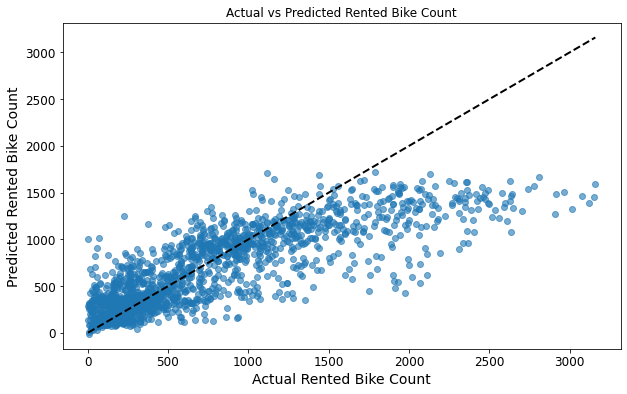

In [34]:
# Choose the best model based on the RMSE
best_model = grid_search_lr.best_estimator_ if mean_rmse_lr_gs < mean_rmse_svr_gs else grid_search_svr.best_estimator_

# Fit the best model to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Best Model Test RMSE: {rmse_test:.2f}')

# Visualise the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [31]:
### Your answer here (maximum of 200 words)

### Chatgpt uses standard scaler in the preprocessing timeline. An alternative scaler would be to use robust scaler. 
### Using a robust scaler beneficial for the data as it has some outliers. Standard scalers scales based on mean and
### standard deviation and assumes data is normally distributed which can make it sensitive to outliers. However, robust scaler uses median and interquartile range which makes it less sensitive to ouliers. 